목적 : 탐색적 데이터 분석 EDA
=====================
목표 : 기초통계량, 상관분석(+유의성 검정),Q-Qplot
-------------------------    

import modules

In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from scipy.stats import shapiro, pearsonr
from itertools import combinations

환경설정

In [2]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

pd.set_option('display.max_seq_items', None)

pd.set_option('float_format', '{:.3f}'.format) # 소수점 3개까지 출력

load file

In [11]:
df1 = pd.read_csv("./상장후보피처+시장지표.csv", encoding='utf-8', index_col=0).dropna()

Data set

In [12]:
df1

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
회사명,,,,,,,,,,,,,,,,,,,,,
(주)CMG제약,58820,2022,19,79,2,6,617,520,15,12,...,23.0,-716.666667,1.614563e+03,6.047905e+04,3.632941e+03,0.0,0,0,1,0
(주)ES큐브,50120,2020,3,270,3,24,62,60,929,754,...,22.0,-0.201808,1.089064e+03,-2.022628e+03,9.382091e+02,1.0,0,0,0,1
(주)MH에탄올,23150,2022,6,9,5,19,28,23,369,200,...,28.0,8.717068,5.885946e+02,3.407741e+03,5.071294e+02,0.0,0,1,0,0
(주)강원에너지,114190,2018,-16,-28,-7,-8,162,161,87,87,...,15.0,21.076923,8.386890e+02,-4.138892e+03,4.901358e+02,1.0,1,0,0,0
(주)고려시멘트,198440,2022,0,7,0,0,402,335,25,9,...,10.0,-9.794239,6.961422e+02,-5.781497e+03,1.088800e+03,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(주)한중엔시에스,107640,2016,2,2,1,1,83,58,363,239,...,11.0,-10.445205,1.047754e+06,1.823092e+07,2.688815e+05,1.0,0,0,1,0
도부마스크 (주),227420,2018,-28,-77,-18,-21,139,139,169,148,...,8.0,-1.147126,7.961455e+05,-5.380708e+06,3.422919e+05,1.0,0,0,0,1
에이치엔에스하이텍(주),44990,2021,13,44,6,5,189,150,99,77,...,9.0,7.601476,2.047153e+06,1.629744e+07,8.857387e+05,1.0,0,0,1,0


In [13]:
df1.isna().sum().sort_values(ascending=False)

거래소코드                0
총자본회전률               0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
매출채권회전률              0
당좌자산회전률              0
유형자산회전율              0
경영자본회전률              0
비유동자산회전률             0
회계년도                 0
유동자산회전률              0
영업년수                 0
상장년수                 0
PER                  0
PBR                  0
PCR                  0
PSR                  0
부실판단                 0
도입기                  0
성숙기                  0
성장기                  0
유형자산증가율              0
매출액증가율               0
비유동자산증가율             0
유동자산증가율              0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
현금비율                 0
유동자산구성비율             0
자기자본구성비율             0
자기자본순이익률   

In [14]:
df1 = df1.rename(columns={'설립일': '영업년수',
                           '상장일': '상장년수'
                           })

df1['영업년수'] = pd.to_datetime(df1['영업년수'])
df1['영업년수'] = df1['영업년수'].dt.year
df1['영업년수'] = 2024 - df1['영업년수']

df1['상장년수'] = pd.to_datetime(df1['상장년수'])
df1['상장년수'] = df1['상장년수'].dt.year
df1['상장년수'] = 2024 - df1['상장년수']

In [15]:
df1.columns

Index(['거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률',
       '매출액정상영업이익률', '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율',
       '비유동자산증가율', '매출액증가율', '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율',
       '부가가치율', '이윤분배율', '자본분배율', '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율',
       '경영자본회전률', '총자본회전률', '비유동자산회전률', '유동자산회전률', '영업년수', '상장년수', 'PER',
       'PBR', 'PCR', 'PSR', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

In [16]:
df1.describe()

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.0,731.000000,7.310000e+02,7.310000e+02,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000
mean,136485.348837,2019.681259,8.166895,1272.220246,-0.017784,-2.742818,299.781122,248.043776,122.132695,95.819425,...,54.0,-12.492086,8.287066e+05,-5.958139e+04,4.218886e+05,0.503420,0.283174,0.303694,0.214774,0.198358
std,125026.424836,3.012015,51.057792,23030.584558,13.794021,41.622696,383.777716,356.114766,368.256894,332.636583,...,0.0,1004.116859,1.953861e+07,6.186723e+06,9.127352e+06,0.500331,0.450849,0.460167,0.410947,0.399037
min,40.000000,2014.000000,-606.000000,-5211.000000,-255.000000,-620.000000,4.000000,3.000000,0.000000,0.000000,...,54.0,-18475.905712,-4.159096e+07,-4.825400e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49495.000000,2017.000000,-10.000000,-14.000000,-4.000000,-7.000000,103.000000,70.000000,31.500000,20.500000,...,54.0,-10.568515,9.213973e+02,-1.986202e+04,7.556210e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100660.000000,2022.000000,2.000000,2.000000,1.000000,2.000000,167.000000,124.000000,69.000000,48.000000,...,54.0,-1.046218,1.507177e+03,3.458297e+03,1.524945e+03,1.000000,0.000000,0.000000,0.000000,0.000000
75%,214220.000000,2022.000000,18.000000,37.000000,6.000000,10.000000,327.500000,261.000000,129.000000,99.500000,...,54.0,16.486919,2.844279e+03,1.512821e+04,3.104285e+03,1.000000,1.000000,1.000000,0.000000,0.000000
max,900340.000000,2022.000000,259.000000,611057.000000,44.000000,90.000000,3542.000000,3246.000000,9039.000000,8254.000000,...,54.0,8800.000000,5.246524e+08,1.198281e+08,2.461992e+08,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df1.isin([0]).sum().sort_values(ascending=False)

쇠퇴기                  586
성장기                  574
도입기                  524
성숙기                  509
부실판단                 363
총자본회전률               267
경영자본회전률              178
자본분배율                109
이윤분배율                107
비유동자산회전률              71
유동자산회전률               68
당좌자산회전률               53
차입금의존도                48
CASH FLOW 대 총자본비율     28
CASH FLOW 대 차입금비율     22
유형자산회전율               20
비유동자산증가율              18
총자본증가율                17
유형자산증가율               17
유동자산증가율               17
매출액증가율                17
CASH FLOW 대 매출액비율     12
현금비율                  11
CASH FLOW 대 부채비율       8
PER                    6
PCR                    6
유동부채비율                 6
순운전자본비율                6
PSR                    6
PBR                    6
부채비율                   5
자기자본순이익률               4
자기자본구성비율               4
총자본투자효율                4
CROE                   3
부가가치율                  3
매출채권회전률                2
설비투자효율                 1
총자산회전율                 1
총자본정상영업이익률             1


범주 분할 1현금흐름 / 2안정성 / 2수익성 / 3유동성 / 4성장성 / 5생산성 / 6활동성 / 7시장지표 및 기타

In [18]:
df1.columns

Index(['거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률',
       '매출액정상영업이익률', '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율',
       '비유동자산증가율', '매출액증가율', '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율',
       '부가가치율', '이윤분배율', '자본분배율', '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율',
       '경영자본회전률', '총자본회전률', '비유동자산회전률', '유동자산회전률', '영업년수', '상장년수', 'PER',
       'PBR', 'PCR', 'PSR', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

In [20]:
# 비상장 all data는 df1
# 비상장 label들

labels = df1[
    [
        '거래소코드',
        '회계년도',
        '부실판단',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기'
    ]
]

# 비상장 피처
features = df1.drop(
    labels=[
        '거래소코드',
        '회계년도',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ],
    axis=1,    
)

# 현금흐름 4개
cash_ft1 = df1[
    [
        'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율',
        'CASH FLOW 대 매출액비율',
        '부실판단'
    ]
]

# 안정성 10개
stability_ft1 = df1[
    [
        '유동비율',
        '당좌비율',
        '부채비율',
        '유동부채비율',
        '차입금의존도',
        '순운전자본비율',
        '현금비율',
        '유동자산구성비율',
        '자기자본구성비율',
        '부실판단'
    ]
]

# 수익성 10개
profitability_ft1 = df1[
    [
        '자기자본순이익률',
        '경영자본순이익률',
        '매출액순이익률',
        '총자본사업이익률',
        '총자본정상영업이익률',
        '매출액정상영업이익률',
        '금융비용부담률',
        'CROE',
        '부실판단'
    ]
]

# 성장성 8개
growth_ft1 = df1[
    [
        '총자산증가율',
        '총자본증가율',
        '유동자산증가율',
        '비유동자산증가율',
        '매출액증가율',
        '유형자산증가율',
        '부실판단'
    ]
]

# 생산성 5개
productivity_ft1 = df1[
    [
        '부가가치(백만원)',
        '총자본투자효율',
        '설비투자효율',
        '부가가치율',
        '이윤분배율',
        '자본분배율',
        '부실판단'
    ]
]

# 활동성 10개
activity_ft1 = df1[
    [
        '총자산회전율',
        '매출채권회전률',
        '당좌자산회전률',
        '유형자산회전율',
        '경영자본회전률',
        '총자본회전률',
        '비유동자산회전률',
        '유동자산회전률',
        '부실판단'
    ]
]

# 시장지표 및 기타
etc_ft1 = df1[
    [
        '영업년수',
        '상장년수',
        'PER',
        'PBR',
        'PCR',
        'PSR',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ]
]

In [21]:
df1_ft = [cash_ft1, stability_ft1, profitability_ft1, growth_ft1, productivity_ft1, activity_ft1]

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, (주)CMG제약 to 태양기계(주)
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   거래소코드              731 non-null    int64  
 1   회계년도               731 non-null    int64  
 2   CASH FLOW 대 부채비율   731 non-null    int64  
 3   CASH FLOW 대 차입금비율  731 non-null    int64  
 4   CASH FLOW 대 총자본비율  731 non-null    int64  
 5   CASH FLOW 대 매출액비율  731 non-null    int64  
 6   유동비율               731 non-null    int64  
 7   당좌비율               731 non-null    int64  
 8   부채비율               731 non-null    int64  
 9   유동부채비율             731 non-null    int64  
 10  차입금의존도             731 non-null    int64  
 11  순운전자본비율            731 non-null    int64  
 12  현금비율               731 non-null    int64  
 13  유동자산구성비율           731 non-null    int64  
 14  자기자본구성비율           731 non-null    int64  
 15  자기자본순이익률           731 non-null    float64
 16  경영자본순이익률           7

In [23]:
df1

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
회사명,,,,,,,,,,,,,,,,,,,,,
(주)CMG제약,58820,2022,19,79,2,6,617,520,15,12,...,54,-716.666667,1.614563e+03,6.047905e+04,3.632941e+03,0.0,0,0,1,0
(주)ES큐브,50120,2020,3,270,3,24,62,60,929,754,...,54,-0.201808,1.089064e+03,-2.022628e+03,9.382091e+02,1.0,0,0,0,1
(주)MH에탄올,23150,2022,6,9,5,19,28,23,369,200,...,54,8.717068,5.885946e+02,3.407741e+03,5.071294e+02,0.0,0,1,0,0
(주)강원에너지,114190,2018,-16,-28,-7,-8,162,161,87,87,...,54,21.076923,8.386890e+02,-4.138892e+03,4.901358e+02,1.0,1,0,0,0
(주)고려시멘트,198440,2022,0,7,0,0,402,335,25,9,...,54,-9.794239,6.961422e+02,-5.781497e+03,1.088800e+03,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(주)한중엔시에스,107640,2016,2,2,1,1,83,58,363,239,...,54,-10.445205,1.047754e+06,1.823092e+07,2.688815e+05,1.0,0,0,1,0
도부마스크 (주),227420,2018,-28,-77,-18,-21,139,139,169,148,...,54,-1.147126,7.961455e+05,-5.380708e+06,3.422919e+05,1.0,0,0,0,1
에이치엔에스하이텍(주),44990,2021,13,44,6,5,189,150,99,77,...,54,7.601476,2.047153e+06,1.629744e+07,8.857387e+05,1.0,0,0,1,0


In [24]:
# def qq_plot(df):
#     # 모든 칼럼 순회
#     for col in df.columns:
#         # Q-Q plot 그리기
#         stats.probplot(df[col], dist="norm", plot=plt)
#         plt.title(f"Q-Q plot for {col}")
#         plt.show()


# Q-Qplot

In [25]:
def qq_plot(df):
    fig, axes = plt.subplots(13, 5, figsize=(15, 30))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(13):
        for j in range(5):
            col_index = i * 5 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

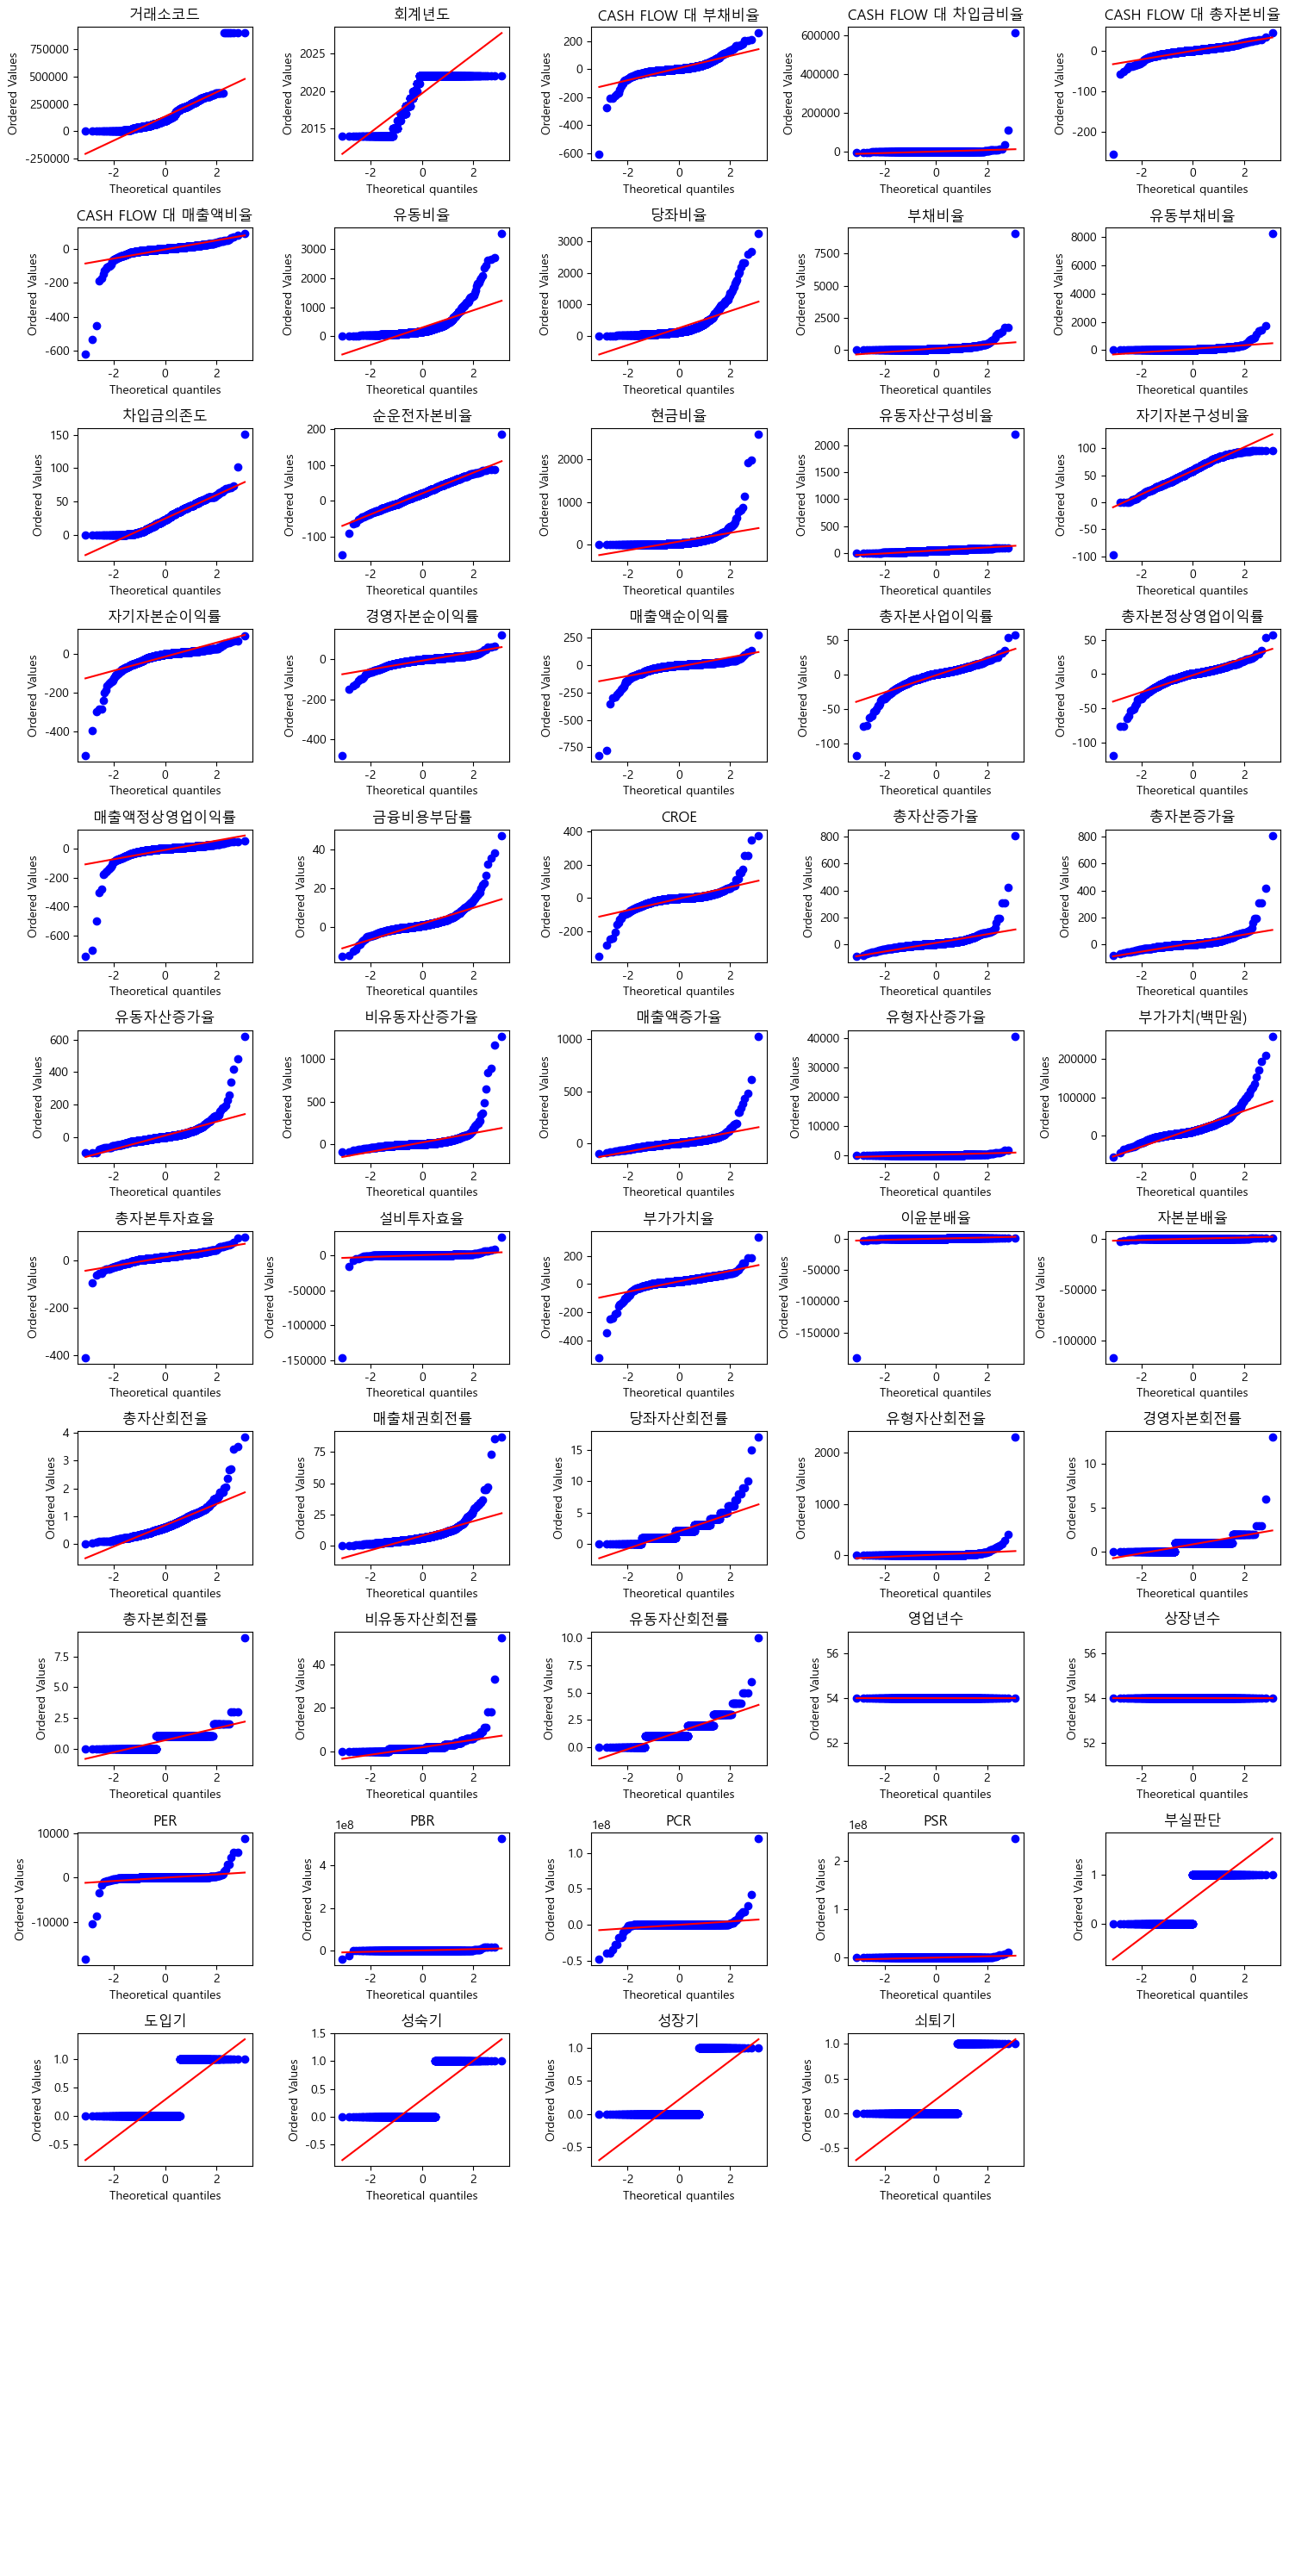

In [26]:
qq_plot(df1)

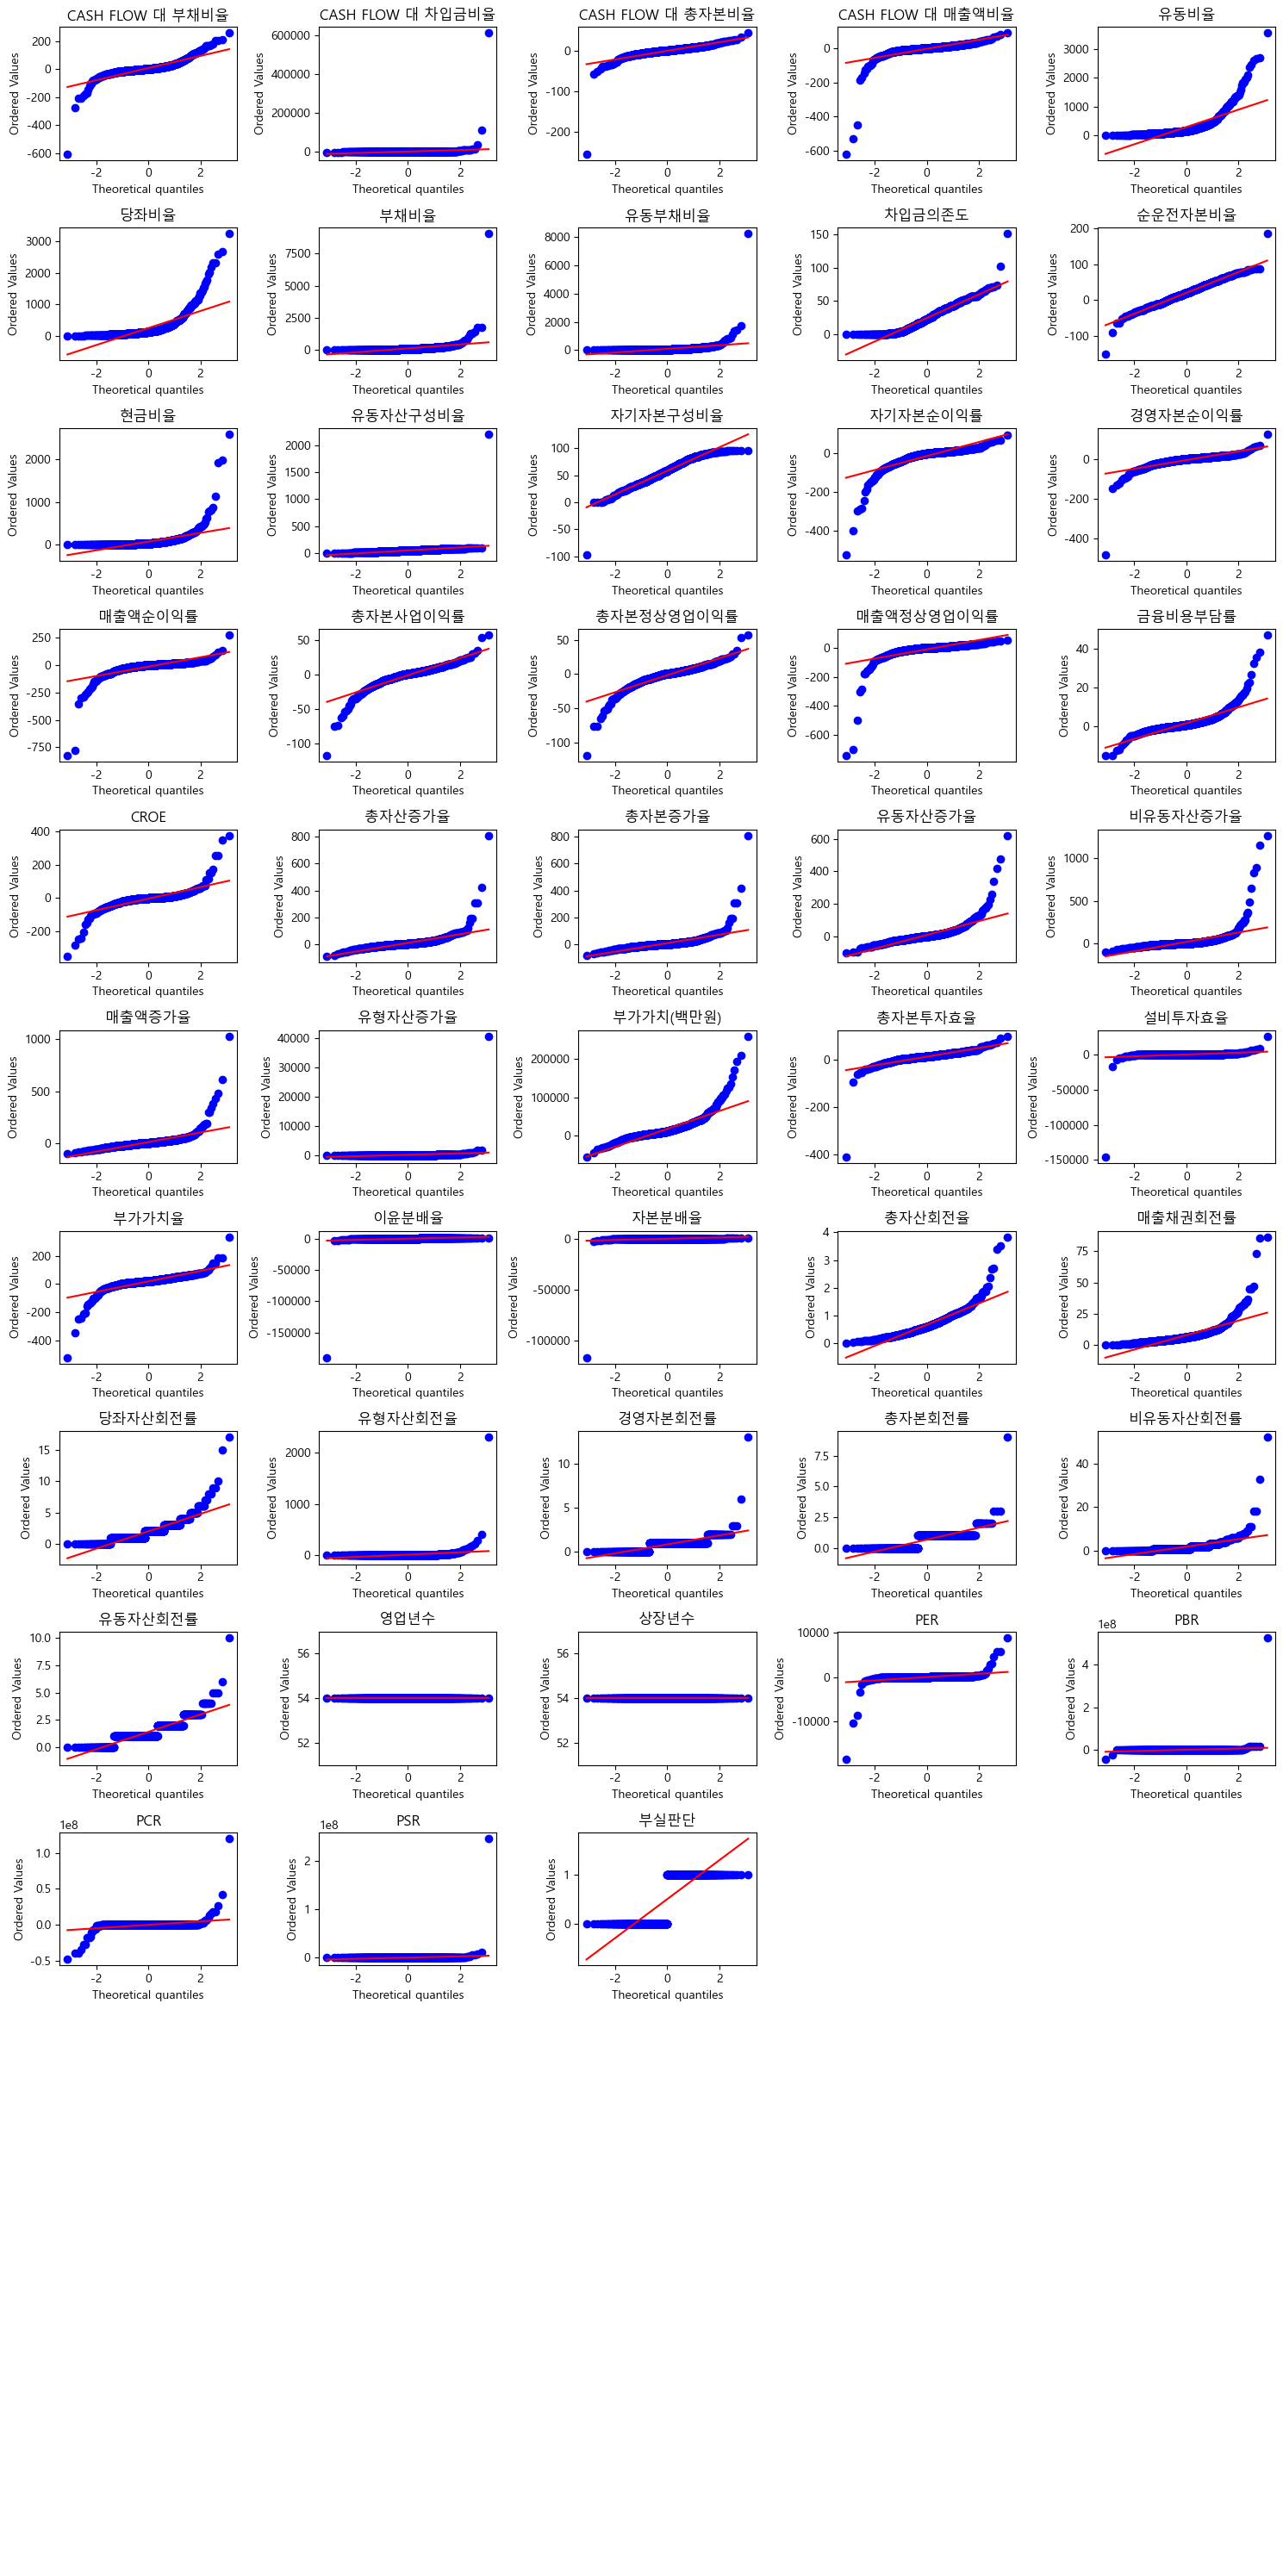

In [28]:
qq_plot(features.drop('부실판단'))

# 상관계수와 유의성 검정

In [29]:
# 상관 계수와 p-value 계산하는 함수
def correlation_and_pval(df):
    columns = df.columns
    corr_dict = {}
    pval_dict = {}
    
    # 모든 특성 쌍에 대한 상관 계수와 p-value 계산
    for col1, col2 in combinations(columns, 2):
        corr, pval = pearsonr(df[col1], df[col2])
        corr_dict[f"{col1}-{col2}"] = corr
        pval_dict[f"{col1}-{col2}"] = pval
    
    return corr_dict, pval_dict

1현금흐름

<Axes: >

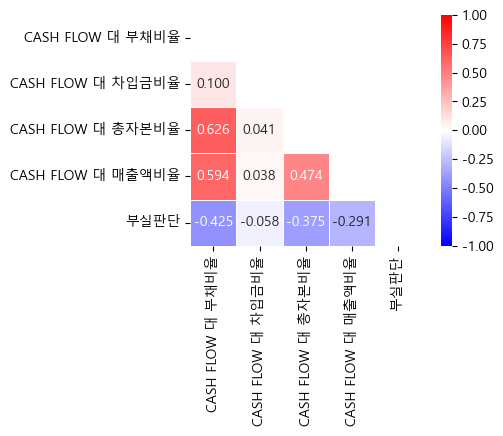

In [30]:
plt.figure(figsize=(5,3))
mask = np.triu(np.ones_like(cash_ft1.corr(), dtype=bool))
sns.heatmap(cash_ft1.corr(),
            vmax=1,
            vmin=-1,
            # center=0,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask) # 좌하방만 표시

In [31]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(cash_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.100
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.626
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.594
CASH FLOW 대 부채비율-부실판단: -0.425
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.041
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.038
CASH FLOW 대 차입금비율-부실판단: -0.058
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.474
CASH FLOW 대 총자본비율-부실판단: -0.375
CASH FLOW 대 매출액비율-부실판단: -0.291
p-value======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.007
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.000
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 부채비율-부실판단: 0.000
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.267
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.304
CASH FLOW 대 차입금비율-부실판단: 0.119
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 총자본비율-부실판단: 0.000
CASH FLOW 대 매출액비율-부실판단: 0.000


In [32]:
np.abs(cash_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단                 1.000000
CASH FLOW 대 부채비율     0.425152
CASH FLOW 대 총자본비율    0.375228
CASH FLOW 대 매출액비율    0.291248
CASH FLOW 대 차입금비율    0.057780
Name: 부실판단, dtype: float64

2안정성

<Axes: >

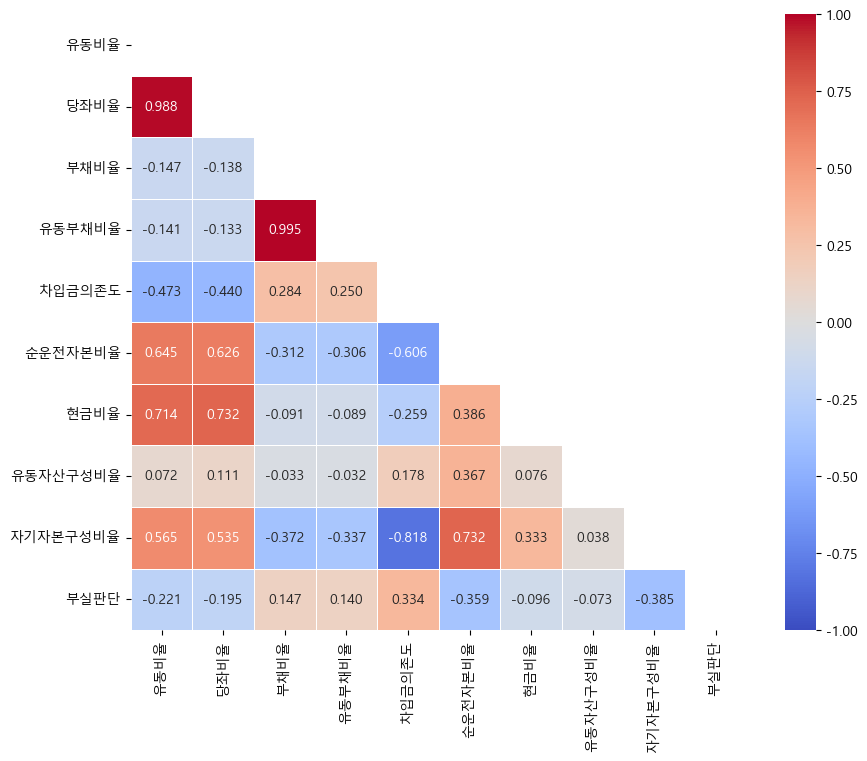

In [33]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

<Axes: >

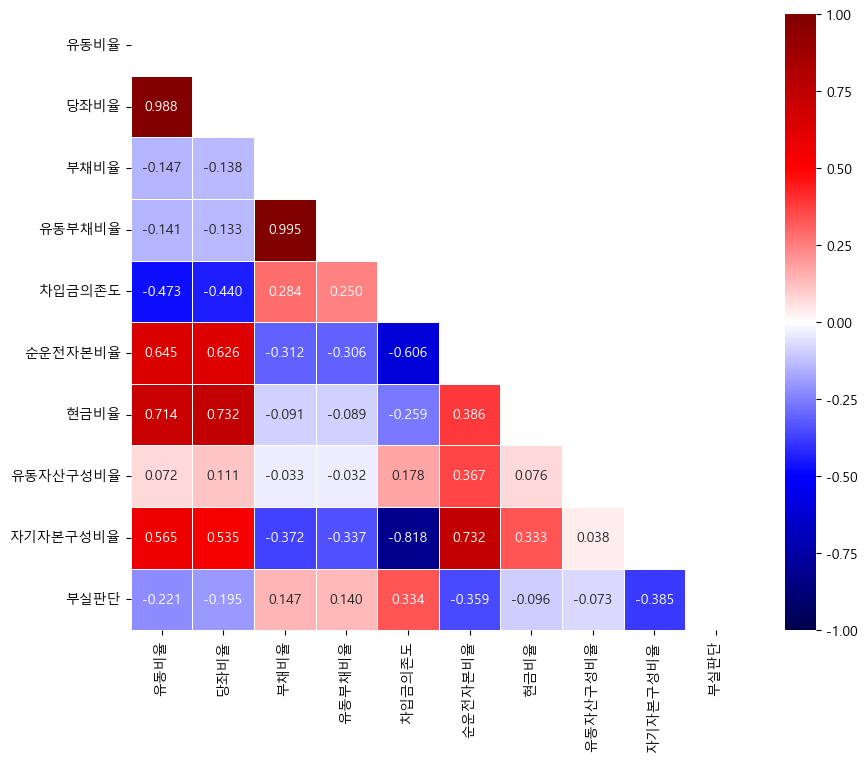

In [34]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='seismic', 
            linewidths=.5, 
            mask = mask)

<Axes: >

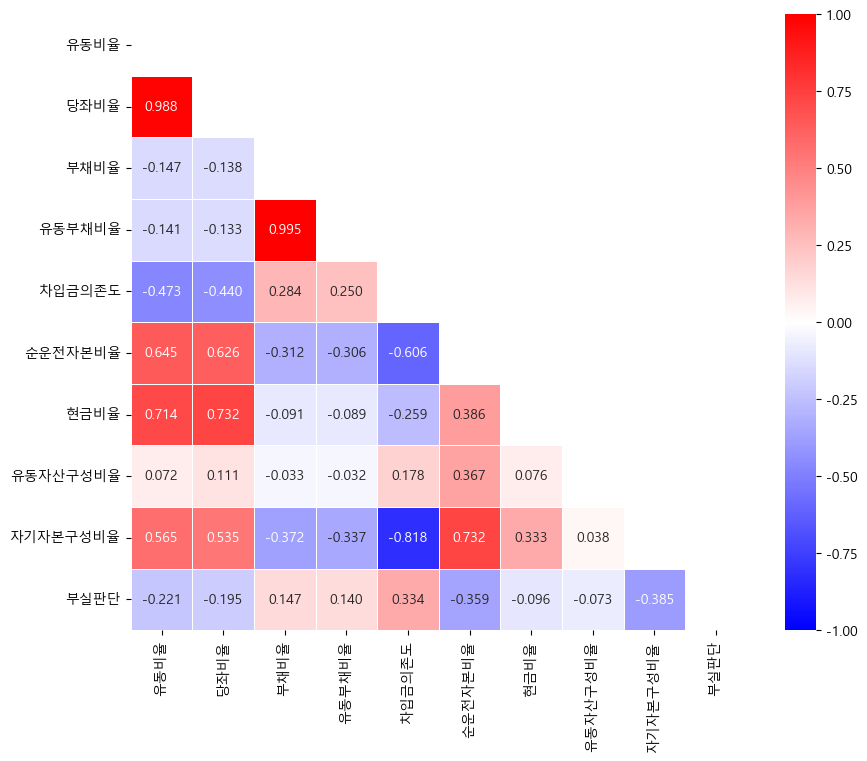

In [35]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [36]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(stability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
유동비율-당좌비율: 0.988
유동비율-부채비율: -0.147
유동비율-유동부채비율: -0.141
유동비율-차입금의존도: -0.473
유동비율-순운전자본비율: 0.645
유동비율-현금비율: 0.714
유동비율-유동자산구성비율: 0.072
유동비율-자기자본구성비율: 0.565
유동비율-부실판단: -0.221
당좌비율-부채비율: -0.138
당좌비율-유동부채비율: -0.133
당좌비율-차입금의존도: -0.440
당좌비율-순운전자본비율: 0.626
당좌비율-현금비율: 0.732
당좌비율-유동자산구성비율: 0.111
당좌비율-자기자본구성비율: 0.535
당좌비율-부실판단: -0.195
부채비율-유동부채비율: 0.995
부채비율-차입금의존도: 0.284
부채비율-순운전자본비율: -0.312
부채비율-현금비율: -0.091
부채비율-유동자산구성비율: -0.033
부채비율-자기자본구성비율: -0.372
부채비율-부실판단: 0.147
유동부채비율-차입금의존도: 0.250
유동부채비율-순운전자본비율: -0.306
유동부채비율-현금비율: -0.089
유동부채비율-유동자산구성비율: -0.032
유동부채비율-자기자본구성비율: -0.337
유동부채비율-부실판단: 0.140
차입금의존도-순운전자본비율: -0.606
차입금의존도-현금비율: -0.259
차입금의존도-유동자산구성비율: 0.178
차입금의존도-자기자본구성비율: -0.818
차입금의존도-부실판단: 0.334
순운전자본비율-현금비율: 0.386
순운전자본비율-유동자산구성비율: 0.367
순운전자본비율-자기자본구성비율: 0.732
순운전자본비율-부실판단: -0.359
현금비율-유동자산구성비율: 0.076
현금비율-자기자본구성비율: 0.333
현금비율-부실판단: -0.096
유동자산구성비율-자기자본구성비율: 0.038
유동자산구성비율-부실판단: -0.073
자기자본구성비율-부실판단: -0.385
p-value======================
유동비율-당좌비율: 0.000
유동

In [37]:
np.abs(stability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단        1.000000
자기자본구성비율    0.385485
순운전자본비율     0.358828
차입금의존도      0.334231
유동비율        0.221161
당좌비율        0.195314
부채비율        0.146712
유동부채비율      0.140111
현금비율        0.095991
유동자산구성비율    0.073338
Name: 부실판단, dtype: float64

3수익성

<Axes: >

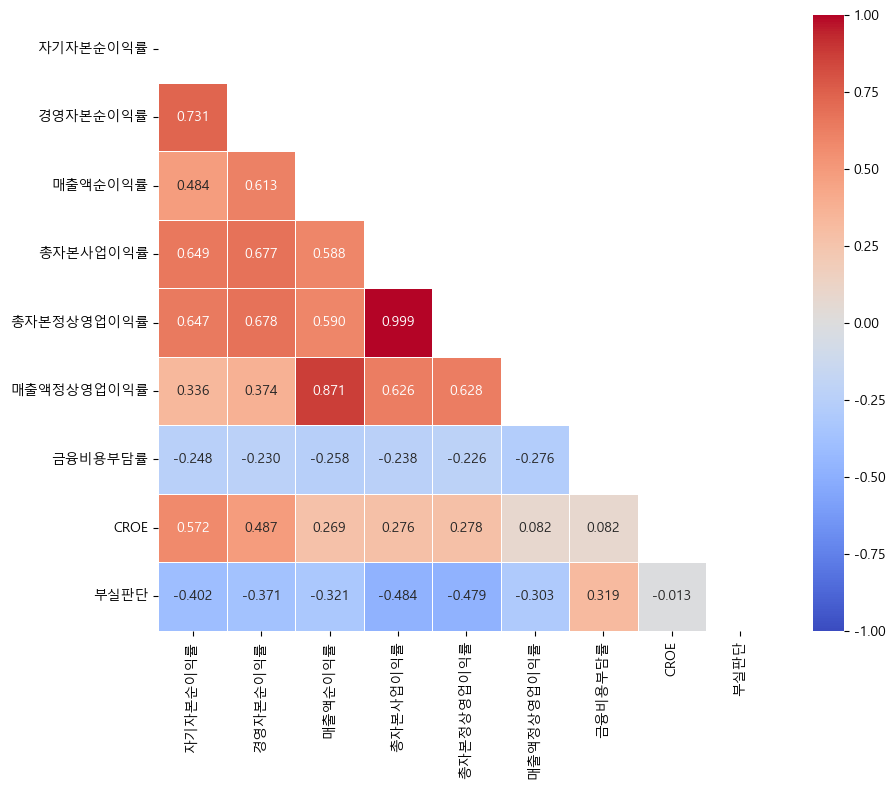

In [38]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(profitability_ft1.corr(), dtype=bool))
sns.heatmap(profitability_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [39]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(profitability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
자기자본순이익률-경영자본순이익률: 0.731
자기자본순이익률-매출액순이익률: 0.484
자기자본순이익률-총자본사업이익률: 0.649
자기자본순이익률-총자본정상영업이익률: 0.647
자기자본순이익률-매출액정상영업이익률: 0.336
자기자본순이익률-금융비용부담률: -0.248
자기자본순이익률-CROE: 0.572
자기자본순이익률-부실판단: -0.402
경영자본순이익률-매출액순이익률: 0.613
경영자본순이익률-총자본사업이익률: 0.677
경영자본순이익률-총자본정상영업이익률: 0.678
경영자본순이익률-매출액정상영업이익률: 0.374
경영자본순이익률-금융비용부담률: -0.230
경영자본순이익률-CROE: 0.487
경영자본순이익률-부실판단: -0.371
매출액순이익률-총자본사업이익률: 0.588
매출액순이익률-총자본정상영업이익률: 0.590
매출액순이익률-매출액정상영업이익률: 0.871
매출액순이익률-금융비용부담률: -0.258
매출액순이익률-CROE: 0.269
매출액순이익률-부실판단: -0.321
총자본사업이익률-총자본정상영업이익률: 0.999
총자본사업이익률-매출액정상영업이익률: 0.626
총자본사업이익률-금융비용부담률: -0.238
총자본사업이익률-CROE: 0.276
총자본사업이익률-부실판단: -0.484
총자본정상영업이익률-매출액정상영업이익률: 0.628
총자본정상영업이익률-금융비용부담률: -0.226
총자본정상영업이익률-CROE: 0.278
총자본정상영업이익률-부실판단: -0.479
매출액정상영업이익률-금융비용부담률: -0.276
매출액정상영업이익률-CROE: 0.082
매출액정상영업이익률-부실판단: -0.303
금융비용부담률-CROE: 0.082
금융비용부담률-부실판단: 0.319
CROE-부실판단: -0.013
p-value======================
자기자본순이익률-경영자본순이익률: 0.000
자기자본순이익률-매출액순이익률: 0.000
자기자본순이익률-총자본사업이익률: 0.000
자기자

In [40]:
np.abs(profitability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단          1.000000
총자본사업이익률      0.484090
총자본정상영업이익률    0.479115
자기자본순이익률      0.402142
경영자본순이익률      0.370990
매출액순이익률       0.320613
금융비용부담률       0.318774
매출액정상영업이익률    0.303108
CROE          0.013191
Name: 부실판단, dtype: float64

4유동성

<Axes: >

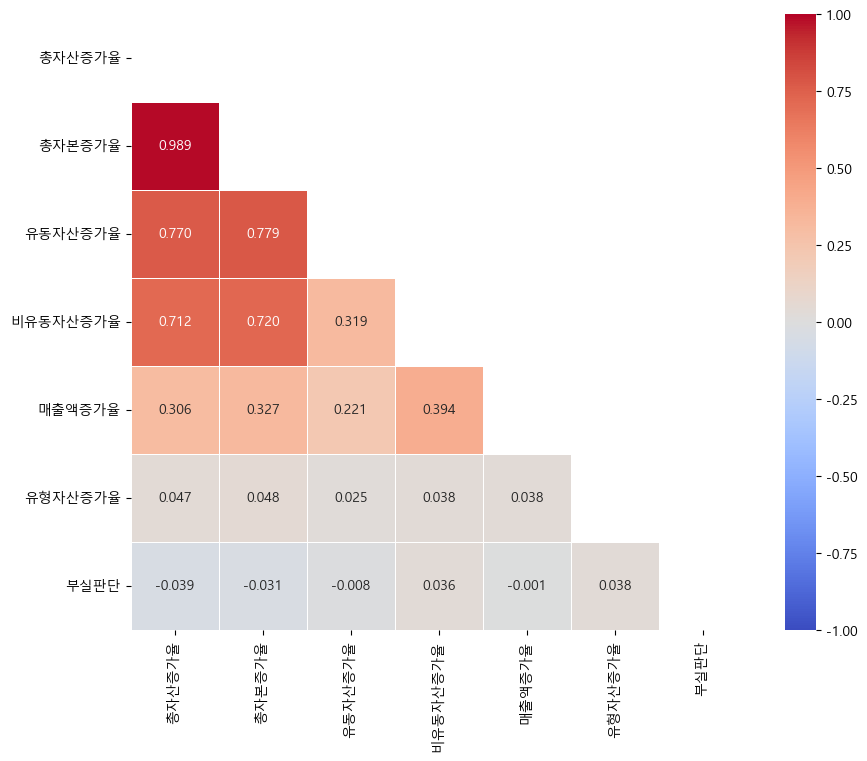

In [41]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(growth_ft1.corr(), dtype=bool))
sns.heatmap(growth_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [42]:
growth_ft1.loc[growth_ft1[growth_ft1['총자산증가율'] == np.inf].index]

,총자산증가율,총자본증가율,유동자산증가율,비유동자산증가율,매출액증가율,유형자산증가율,부실판단
회사명,,,,,,,


In [43]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(growth_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산증가율-총자본증가율: 0.989
총자산증가율-유동자산증가율: 0.770
총자산증가율-비유동자산증가율: 0.712
총자산증가율-매출액증가율: 0.306
총자산증가율-유형자산증가율: 0.047
총자산증가율-부실판단: -0.039
총자본증가율-유동자산증가율: 0.779
총자본증가율-비유동자산증가율: 0.720
총자본증가율-매출액증가율: 0.327
총자본증가율-유형자산증가율: 0.048
총자본증가율-부실판단: -0.031
유동자산증가율-비유동자산증가율: 0.319
유동자산증가율-매출액증가율: 0.221
유동자산증가율-유형자산증가율: 0.025
유동자산증가율-부실판단: -0.008
비유동자산증가율-매출액증가율: 0.394
비유동자산증가율-유형자산증가율: 0.038
비유동자산증가율-부실판단: 0.036
매출액증가율-유형자산증가율: 0.038
매출액증가율-부실판단: -0.001
유형자산증가율-부실판단: 0.038
p-value======================
총자산증가율-총자본증가율: 0.000
총자산증가율-유동자산증가율: 0.000
총자산증가율-비유동자산증가율: 0.000
총자산증가율-매출액증가율: 0.000
총자산증가율-유형자산증가율: 0.206
총자산증가율-부실판단: 0.290
총자본증가율-유동자산증가율: 0.000
총자본증가율-비유동자산증가율: 0.000
총자본증가율-매출액증가율: 0.000
총자본증가율-유형자산증가율: 0.198
총자본증가율-부실판단: 0.399
유동자산증가율-비유동자산증가율: 0.000
유동자산증가율-매출액증가율: 0.000
유동자산증가율-유형자산증가율: 0.497
유동자산증가율-부실판단: 0.819
비유동자산증가율-매출액증가율: 0.000
비유동자산증가율-유형자산증가율: 0.311
비유동자산증가율-부실판단: 0.334
매출액증가율-유형자산증가율: 0.301
매출액증가율-부실판단: 0.987
유형자산증가율-부실판단: 0.307


In [44]:
np.abs(growth_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단        1.000000
총자산증가율      0.039201
유형자산증가율     0.037857
비유동자산증가율    0.035775
총자본증가율      0.031269
유동자산증가율     0.008465
매출액증가율      0.000626
Name: 부실판단, dtype: float64

5생산성

<Axes: >

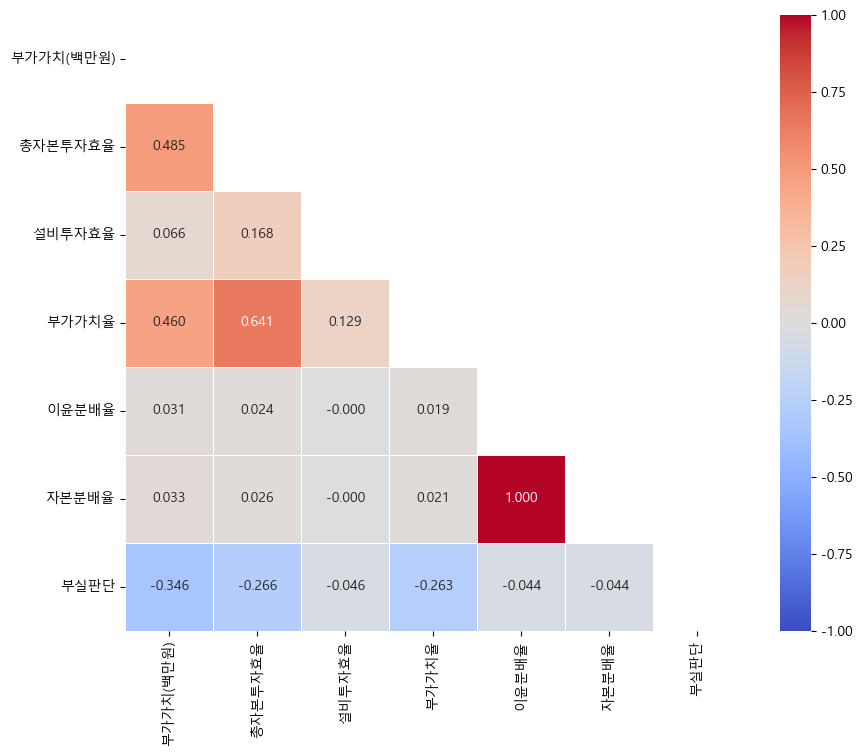

In [45]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(productivity_ft1.corr(), dtype=bool))
sns.heatmap(productivity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [46]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(productivity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
부가가치(백만원)-총자본투자효율: 0.485
부가가치(백만원)-설비투자효율: 0.066
부가가치(백만원)-부가가치율: 0.460
부가가치(백만원)-이윤분배율: 0.031
부가가치(백만원)-자본분배율: 0.033
부가가치(백만원)-부실판단: -0.346
총자본투자효율-설비투자효율: 0.168
총자본투자효율-부가가치율: 0.641
총자본투자효율-이윤분배율: 0.024
총자본투자효율-자본분배율: 0.026
총자본투자효율-부실판단: -0.266
설비투자효율-부가가치율: 0.129
설비투자효율-이윤분배율: -0.000
설비투자효율-자본분배율: -0.000
설비투자효율-부실판단: -0.046
부가가치율-이윤분배율: 0.019
부가가치율-자본분배율: 0.021
부가가치율-부실판단: -0.263
이윤분배율-자본분배율: 1.000
이윤분배율-부실판단: -0.044
자본분배율-부실판단: -0.044
p-value======================
부가가치(백만원)-총자본투자효율: 0.000
부가가치(백만원)-설비투자효율: 0.073
부가가치(백만원)-부가가치율: 0.000
부가가치(백만원)-이윤분배율: 0.408
부가가치(백만원)-자본분배율: 0.373
부가가치(백만원)-부실판단: 0.000
총자본투자효율-설비투자효율: 0.000
총자본투자효율-부가가치율: 0.000
총자본투자효율-이윤분배율: 0.516
총자본투자효율-자본분배율: 0.481
총자본투자효율-부실판단: 0.000
설비투자효율-부가가치율: 0.000
설비투자효율-이윤분배율: 0.990
설비투자효율-자본분배율: 1.000
설비투자효율-부실판단: 0.214
부가가치율-이윤분배율: 0.608
부가가치율-자본분배율: 0.569
부가가치율-부실판단: 0.000
이윤분배율-자본분배율: 0.000
이윤분배율-부실판단: 0.238
자본분배율-부실판단: 0.235


In [47]:
np.abs(productivity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단         1.000000
부가가치(백만원)    0.346269
총자본투자효율      0.266207
부가가치율        0.262787
설비투자효율       0.045965
자본분배율        0.043983
이윤분배율        0.043729
Name: 부실판단, dtype: float64

6활동성

<Axes: >

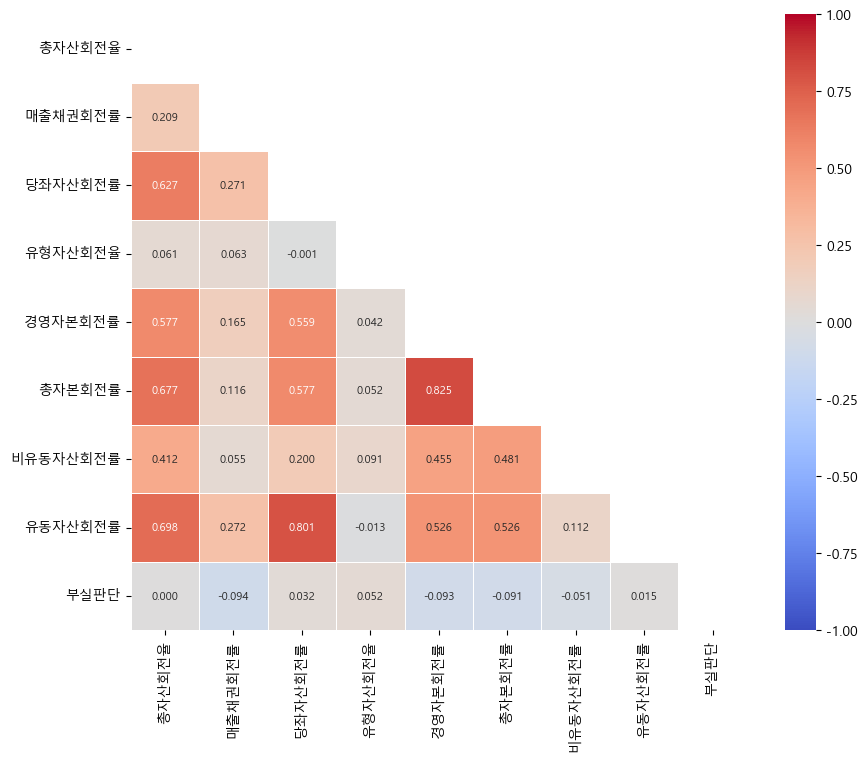

In [48]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(activity_ft1.corr(), dtype=bool))
sns.heatmap(activity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [49]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(activity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산회전율-매출채권회전률: 0.209
총자산회전율-당좌자산회전률: 0.627
총자산회전율-유형자산회전율: 0.061
총자산회전율-경영자본회전률: 0.577
총자산회전율-총자본회전률: 0.677
총자산회전율-비유동자산회전률: 0.412
총자산회전율-유동자산회전률: 0.698
총자산회전율-부실판단: 0.000
매출채권회전률-당좌자산회전률: 0.271
매출채권회전률-유형자산회전율: 0.063
매출채권회전률-경영자본회전률: 0.165
매출채권회전률-총자본회전률: 0.116
매출채권회전률-비유동자산회전률: 0.055
매출채권회전률-유동자산회전률: 0.272
매출채권회전률-부실판단: -0.094
당좌자산회전률-유형자산회전율: -0.001
당좌자산회전률-경영자본회전률: 0.559
당좌자산회전률-총자본회전률: 0.577
당좌자산회전률-비유동자산회전률: 0.200
당좌자산회전률-유동자산회전률: 0.801
당좌자산회전률-부실판단: 0.032
유형자산회전율-경영자본회전률: 0.042
유형자산회전율-총자본회전률: 0.052
유형자산회전율-비유동자산회전률: 0.091
유형자산회전율-유동자산회전률: -0.013
유형자산회전율-부실판단: 0.052
경영자본회전률-총자본회전률: 0.825
경영자본회전률-비유동자산회전률: 0.455
경영자본회전률-유동자산회전률: 0.526
경영자본회전률-부실판단: -0.093
총자본회전률-비유동자산회전률: 0.481
총자본회전률-유동자산회전률: 0.526
총자본회전률-부실판단: -0.091
비유동자산회전률-유동자산회전률: 0.112
비유동자산회전률-부실판단: -0.051
유동자산회전률-부실판단: 0.015
p-value======================
총자산회전율-매출채권회전률: 0.000
총자산회전율-당좌자산회전률: 0.000
총자산회전율-유형자산회전율: 0.101
총자산회전율-경영자본회전률: 0.000
총자산회전율-총자본회전률: 0.000
총자산회전율-비유동자산회전률: 0.000
총자산회전율-유

In [50]:
np.abs(activity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단        1.000000
매출채권회전률     0.094446
경영자본회전률     0.093415
총자본회전률      0.090616
유형자산회전율     0.052198
비유동자산회전률    0.050525
당좌자산회전률     0.031889
유동자산회전률     0.015215
총자산회전율      0.000434
Name: 부실판단, dtype: float64

7시장지표 및 기타

<Axes: >

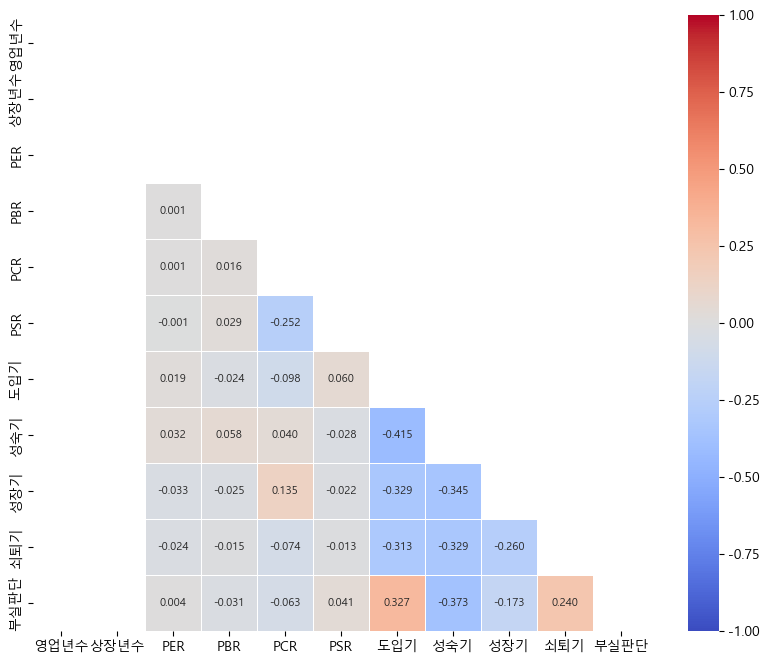

In [51]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(etc_ft1.corr(), dtype=bool))
sns.heatmap(etc_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask
)

In [52]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(etc_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
영업년수-상장년수: nan
영업년수-PER: nan
영업년수-PBR: nan
영업년수-PCR: nan
영업년수-PSR: nan
영업년수-도입기: nan
영업년수-성숙기: nan
영업년수-성장기: nan
영업년수-쇠퇴기: nan
영업년수-부실판단: nan
상장년수-PER: nan
상장년수-PBR: nan
상장년수-PCR: nan
상장년수-PSR: nan
상장년수-도입기: nan
상장년수-성숙기: nan
상장년수-성장기: nan
상장년수-쇠퇴기: nan
상장년수-부실판단: nan
PER-PBR: 0.001
PER-PCR: 0.001
PER-PSR: -0.001
PER-도입기: 0.019
PER-성숙기: 0.032
PER-성장기: -0.033
PER-쇠퇴기: -0.024
PER-부실판단: 0.004
PBR-PCR: 0.016
PBR-PSR: 0.029
PBR-도입기: -0.024
PBR-성숙기: 0.058
PBR-성장기: -0.025
PBR-쇠퇴기: -0.015
PBR-부실판단: -0.031
PCR-PSR: -0.252
PCR-도입기: -0.098
PCR-성숙기: 0.040
PCR-성장기: 0.135
PCR-쇠퇴기: -0.074
PCR-부실판단: -0.063
PSR-도입기: 0.060
PSR-성숙기: -0.028
PSR-성장기: -0.022
PSR-쇠퇴기: -0.013
PSR-부실판단: 0.041
도입기-성숙기: -0.415
도입기-성장기: -0.329
도입기-쇠퇴기: -0.313
도입기-부실판단: 0.327
성숙기-성장기: -0.345
성숙기-쇠퇴기: -0.329
성숙기-부실판단: -0.373
성장기-쇠퇴기: -0.260
성장기-부실판단: -0.173
쇠퇴기-부실판단: 0.240
p-value======================
영업년수-상장년수: nan
영업년수-PER: nan
영업년수-PBR: nan
영업년수-PCR: nan
영업년수-PSR: nan
영업년수-도입기: nan
영업년수-성숙기: nan
영업년수

In [53]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(etc_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
영업년수-상장년수: nan
영업년수-PER: nan
영업년수-PBR: nan
영업년수-PCR: nan
영업년수-PSR: nan
영업년수-도입기: nan
영업년수-성숙기: nan
영업년수-성장기: nan
영업년수-쇠퇴기: nan
영업년수-부실판단: nan
상장년수-PER: nan
상장년수-PBR: nan
상장년수-PCR: nan
상장년수-PSR: nan
상장년수-도입기: nan
상장년수-성숙기: nan
상장년수-성장기: nan
상장년수-쇠퇴기: nan
상장년수-부실판단: nan
PER-PBR: 0.001
PER-PCR: 0.001
PER-PSR: -0.001
PER-도입기: 0.019
PER-성숙기: 0.032
PER-성장기: -0.033
PER-쇠퇴기: -0.024
PER-부실판단: 0.004
PBR-PCR: 0.016
PBR-PSR: 0.029
PBR-도입기: -0.024
PBR-성숙기: 0.058
PBR-성장기: -0.025
PBR-쇠퇴기: -0.015
PBR-부실판단: -0.031
PCR-PSR: -0.252
PCR-도입기: -0.098
PCR-성숙기: 0.040
PCR-성장기: 0.135
PCR-쇠퇴기: -0.074
PCR-부실판단: -0.063
PSR-도입기: 0.060
PSR-성숙기: -0.028
PSR-성장기: -0.022
PSR-쇠퇴기: -0.013
PSR-부실판단: 0.041
도입기-성숙기: -0.415
도입기-성장기: -0.329
도입기-쇠퇴기: -0.313
도입기-부실판단: 0.327
성숙기-성장기: -0.345
성숙기-쇠퇴기: -0.329
성숙기-부실판단: -0.373
성장기-쇠퇴기: -0.260
성장기-부실판단: -0.173
쇠퇴기-부실판단: 0.240
p-value======================
영업년수-상장년수: nan
영업년수-PER: nan
영업년수-PBR: nan
영업년수-PCR: nan
영업년수-PSR: nan
영업년수-도입기: nan
영업년수-성숙기: nan
영업년수